In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st 

In [3]:
netflix_df = pd.read_csv("netflix_titles.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
netflix_df.director.fillna("No director",inplace=True)
netflix_df.cast.fillna("No cast",inplace=True)
netflix_df.country.fillna("Country N.A",inplace=True)
netflix_df.dropna(subset=["date_added", "rating"], inplace=True)

In [6]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# 1. Make a visualization showing the total number of movies watched by children

In [8]:
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

In [9]:
netflix_df.shape

(6214, 12)

In [10]:
filtered_genres.value_counts()

International Movies            1927
Dramas                          1622
Comedies                        1113
International TV Shows           999
Documentaries                    668
TV Dramas                        598
Action & Adventure               597
Independent Movies               552
TV Comedies                      428
Thrillers                        392
Children & Family Movies         378
Romantic Movies                  376
Crime TV Shows                   362
Kids' TV                         325
Stand-Up Comedy                  281
Romantic TV Shows                278
Docuseries                       278
Horror Movies                    262
Music & Musicals                 243
British TV Shows                 209
Sci-Fi & Fantasy                 193
Sports Movies                    157
Reality TV                       153
Korean TV Shows                  132
TV Action & Adventure            125
Spanish-Language TV Shows        116
Anime Series                     115
C

In [11]:
children = [("Kids' TV", 325),("Children & Family Movies", 378)]
children = dict(children)
for_kids = children["Children & Family Movies"] + children["Kids' TV"]
print("Movies + TV shows for children : ",for_kids)
total = 6214
print("Total content : ",total)
ovr_percent = (for_kids/total)*100
print("Percentage of children's content : ",ovr_percent)
y = children["Children & Family Movies"]
print("Movies for children",y)
z = (netflix_df.type == "Movie").sum()
print("Total Movies : ",z)
p = (y/z)*100
print("Percentage of children's movies : ",p)
print("Percentage of movies not for children : ",100-p)

Movies + TV shows for children :  703
Total content :  6214
Percentage of children's content :  11.313163823624075
Movies for children 378
Total Movies :  4257
Percentage of children's movies :  8.879492600422834
Percentage of movies not for children :  91.12050739957716


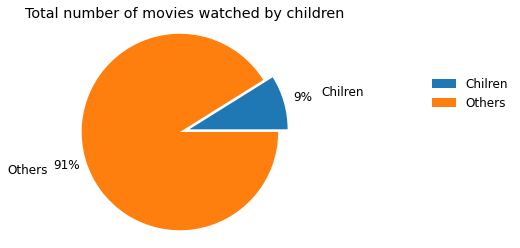

In [14]:

fig, ax = plt.subplots()
plt.rcParams['font.size']=12
labels = ['Chilren', 
         'Others']

percentages = [8.879492600422834, 91.12050739957716]

explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', shadow=False, startangle=0, pctdistance=1.2,labeldistance=1.4)   
ax.axis('equal')
ax.set_title("Total number of movies watched by children")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

In [63]:
#netflix_df.query('listed_in == "Children & Family Movies"').listed_in.count()

In [64]:
#(netflix_df.listed_in == "Kids' TV").sum()

In [65]:
#def return_counter(data_frame, column_name, limit):
#    from collections import Counter    
#    print(dict(Counter(data_frame[column_name].values).most_common(limit)))

In [66]:
#return_counter(netflix_df, 'listed_in', 10)

# 2. Make a visualization showing the total number of standup comedies

In [15]:
StandUpComedy = 281
StandUpComedy_TalkShows = 42
total_standup = 323
print("Stand-up Comedies ; ",total_standup)
total_shows = (netflix_df.type == "TV Show").sum()
print("Total TV Shows : ",total_shows)
percent_standup = (total_standup/total_shows)*100
print("Percentage of Stand-up Comedies : ",percent_standup)
print("Percentage of non Stand-up Comedies : ",100-percent_standup)

Stand-up Comedies ;  323
Total TV Shows :  1957
Percentage of Stand-up Comedies :  16.50485436893204
Percentage of non Stand-up Comedies :  83.49514563106796


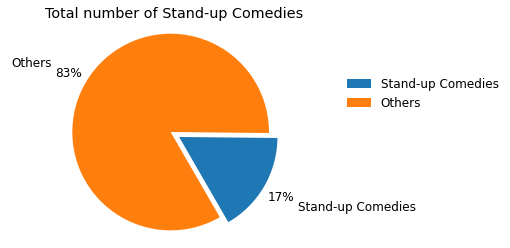

In [16]:
fig, ax = plt.subplots()

labels = ['Stand-up Comedies', 'Others'] 
         

percentages = [16.50485436893204, 83.49514563106796]
plt.rcParams['font.size']=12
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', shadow=False, startangle=-60, pctdistance=1.2,labeldistance=1.4)   
ax.axis('equal')
ax.set_title("Total number of Stand-up Comedies")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

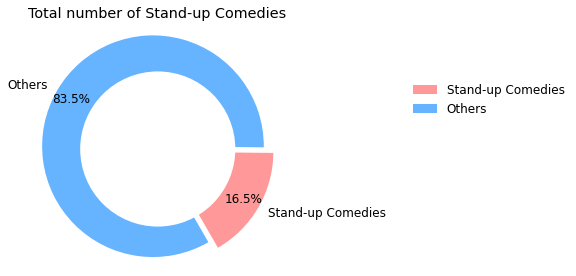

In [120]:
fig, ax1 = plt.subplots()

labels = ['Stand-up Comedies', 'Others']
sizes = [16.50485436893204, 83.49514563106796]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']#colors
explode = (0.05,0.05)#explsion

plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=-60, pctdistance=0.85, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
#fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.set(title='Total number of Stand-up Comedies')
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.tight_layout()

plt.show()

# 3. Make a visualization showing most watched shows.

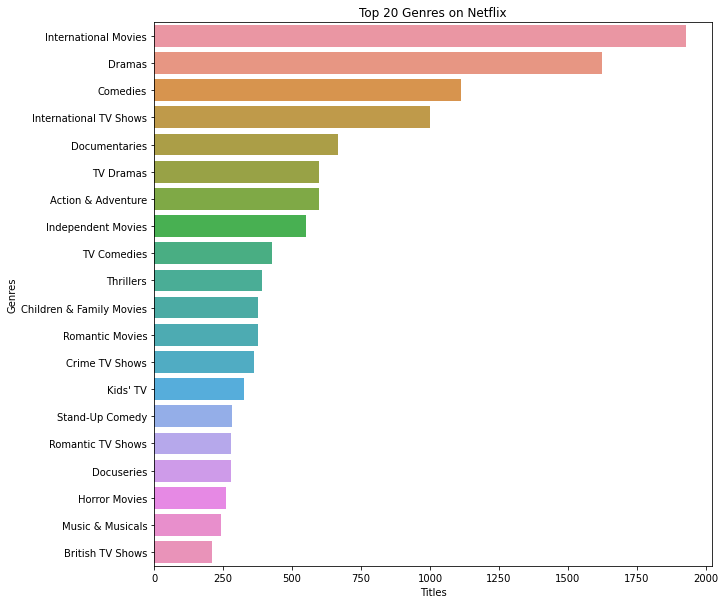

In [21]:
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

# 4. Make a visualization showing highest rated show

Text(0.5, 1.0, 'Rating Count in Netflix')

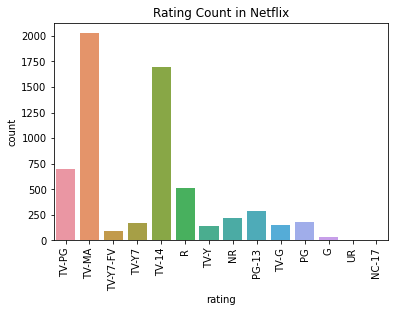

In [20]:
sns.countplot(netflix_df["rating"])
plt.xticks(rotation=90)
plt.title("Rating Count in Netflix")